## Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
%matplotlib inline

## Data Exploration

In [7]:
diabetes=pd.read_csv("/Users/praga/Downloads/Data/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diabetes.shape

(768, 9)

In [9]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

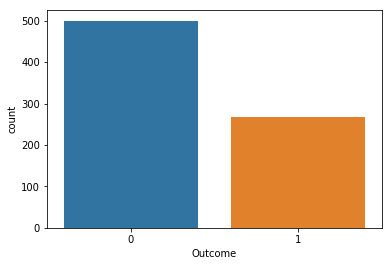

In [12]:
sns.countplot(diabetes.Outcome)

## k-Nearest Neighbors

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

hyperparameters = {
    "n_neighbors": range(3,15,1),
    "weights": ["distance", "uniform"],
    "algorithm": ['auto','brute'],
    "p": [1,2],
    "leaf_size":[30,20]
}
grid = GridSearchCV(knn, param_grid=hyperparameters, cv=10)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)
best_knn = grid.best_estimator_

{'n_neighbors': 10, 'weights': 'uniform', 'leaf_size': 30, 'algorithm': 'auto', 'p': 1}
0.7517361111111112


In [103]:
knn_pred=best_knn.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score
print(accuracy_score(knn_pred,y_test)) 

0.78125


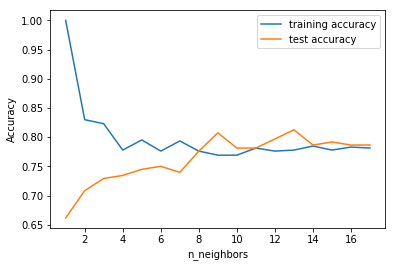

In [105]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,18)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,algorithm='auto',p=1,weights='uniform')
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

plt.savefig('knn_compare_model')

We are getting the best test accuracy at n_neighbours = 10

In [106]:
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(best_knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(best_knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.78


## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)
hyperparameters = {
    "C": [100,200,500],
    "solver": ['lbfgs', 'liblinear', 'sag', 'saga'],
    "max_iter": [100,250,500],
    
}
grid = GridSearchCV(logreg, param_grid=hyperparameters, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
best_logreg = grid.best_estimator_

C:\Users\praga\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'C': 500, 'max_iter': 100, 'solver': 'lbfgs'}
0.7795138888888888


In [15]:
logreg_pred=best_logreg.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(logreg_pred,y_test)) 

0.7864583333333334


In [17]:
print("Training set accuracy: {:.3f}".format(best_logreg.score(X_train, y_train)))
print("Test set accuracy    : {:.3f}".format(best_logreg.score(X_test, y_test)))

Training set accuracy: 0.790
Test set accuracy    : 0.786


In [18]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy when C=0.01: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy when C=0.01    : {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy when C=0.01: 0.700
Test set accuracy when C=0.01    : 0.703


In [19]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy when C= 100: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy when C= 100    : {:.3f}".format(logreg100.score(X_test, y_test)))

Training set accuracy when C= 100: 0.785
Test set accuracy when C= 100    : 0.766


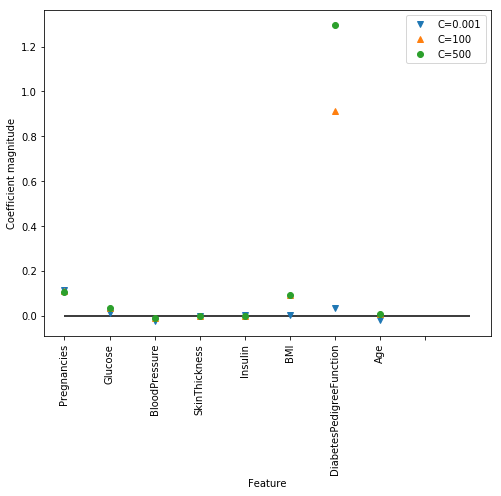

In [20]:
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8]

plt.figure(figsize=(8,6))

plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(best_logreg.coef_.T, 'o', label="C=500")
plt.xticks(range(diabetes.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, diabetes.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')


Using C=100 results in a little bit higher accuracy on training set little bit lower accuracy on test set, confirming that less regularization and a more complex model may not generalize better than default setting.

Finally, let’s look at the coefficients learned by the models with the three different settings of the regularization parameter C.

Stronger regularization (C=0.001) pushes coefficients more and more toward zero. Inspecting the plot more closely, we can also see that feature “DiabetesPedigreeFunction”, for C=100, C=500 and C=0.001, the coefficient is positive. This indicates that high “DiabetesPedigreeFunction” feature is related to a sample being “diabetes”, regardless which model we look at.

## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
hyperparameters = {
    "criterion": ['gini','entropy'],
    "max_features": ['auto', 'sqrt','log2'],
    "max_depth": [2,3,5,4],
    'min_samples_split':[5,4,3]
    
}
grid = GridSearchCV(tree, param_grid=hyperparameters, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
best_tree = grid.best_estimator_

{'max_features': 'log2', 'min_samples_split': 3, 'criterion': 'entropy', 'max_depth': 4}
0.7395833333333334


In [28]:
print("Accuracy on training set: {:.3f}".format(best_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(best_tree.score(X_test, y_test)))

Accuracy on training set: 0.780
Accuracy on test set: 0.734


In [29]:
print("Feature importances:\n{}".format(best_tree.feature_importances_))

Feature importances:
[0.06234262 0.42931415 0.03374804 0.         0.         0.28969936
 0.04265153 0.14224429]


In [ ]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_diabetes(best_tree)
plt.savefig('feature_importance')

Feature "Glucose" is by far the most important feature.

## Random Forest

In [202]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.786


The random forest gives us an accuracy of 78.6%, better than the logistic regression model or a single decision tree, without tuning any parameters. However, we can adjust other features, to see whether the result can be improved.

In [203]:
rf = RandomForestClassifier()
hyperparameters = {"criterion": ["entropy", "gini"],
                   "max_depth": [5,6],
                   "max_features": ["auto","log2", "sqrt"],
                   "min_samples_leaf": [5,7],
                   "min_samples_split": [3,5,6],
                   "n_estimators": [50,100,150]
}
grid = GridSearchCV(rf,param_grid=hyperparameters,cv=10)

grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
best_rand = grid.best_estimator_

{'min_samples_leaf': 7, 'n_estimators': 50, 'min_samples_split': 6, 'criterion': 'gini', 'max_features': 'log2', 'max_depth': 6}
0.7725694444444444


In [204]:
print("Accuracy on training set: {:.3f}".format(best_rand.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(best_rand.score(X_test, y_test)))

Accuracy on training set: 0.849
Accuracy on test set: 0.766


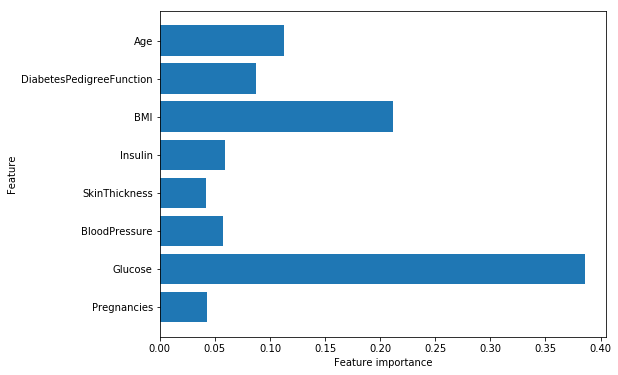

In [207]:
plot_feature_importances_diabetes(best_rand)

## Gradient Boosting

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

In [18]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.917
Accuracy on test set: 0.792


We are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate:

In [36]:
gb = GradientBoostingClassifier()
hyperparameters = {
                   "learning_rate": [0.1,0.01],
                   "max_depth": [3,5],
                   "min_samples_leaf": [5,3],
                   "min_samples_split": [2,5],
                   "n_estimators": [15,25]
}
grid = GridSearchCV(gb,param_grid=hyperparameters,cv=10)

grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
best_gb = grid.best_estimator_

{'min_samples_split': 5, 'n_estimators': 25, 'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 3}
0.7621527777777778


In [37]:
print("Accuracy on training set: {:.3f}".format(best_gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(best_gb.score(X_test, y_test)))

Accuracy on training set: 0.932
Accuracy on test set: 0.792


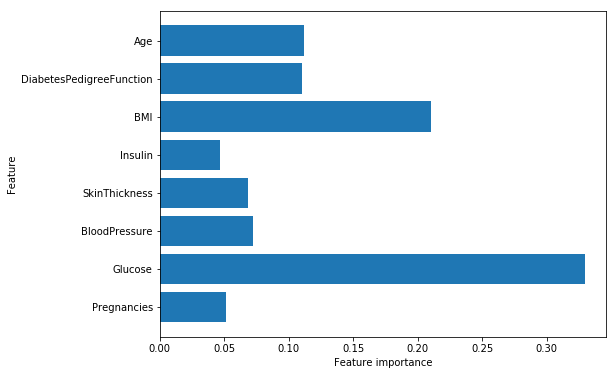

In [38]:
plot_feature_importances_diabetes(best_gb)

We can see that the feature importances of the gradient boosted trees are somewhat similar to the feature importances of the random forests, it gives weight to all of the features in this case.

## Support Vector Machine

In [23]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.651


The model overfits quite substantially, with a perfect score on the training set and only 65% accuracy on the test set.

SVM requires all the features to vary on a similar scale. We will need to rescale our data that all the features are approximately on the same scale:

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.77
Accuracy on test set: 0.77


Scaling the data made a huge difference! Now we are actually in an underfitting regime, where training and test set performance are quite similar but less close to 100% accuracy. From here, we can try increasing either C or gamma to fit a more complex model.

In [72]:
svc = SVC()
hyperparameters = {"C": [15,10],
                   "kernel": ['linear','poly','rbf'],
                   'gamma':['auto',2.5],
                   'max_iter':[-1,50,100],
                   
                  
}
grid = GridSearchCV(svc,param_grid=hyperparameters,cv=10)

grid.fit(X_train_scaled, y_train)
print(grid.best_params_)
print(grid.best_score_)
best_svc = grid.best_estimator_


{'kernel': 'rbf', 'C': 15, 'max_iter': -1, 'gamma': 'auto'}
0.7725694444444444


In [73]:
print("Accuracy on training set: {:.3f}".format(best_svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(best_svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.781
Accuracy on test set: 0.797
